In [1]:
# supervised machine learning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae


In [6]:
import os
os.listdir()
df = pd.read_excel("Machine_v1.xlsx","Data")
df.head(11)

,YearsExp,YearEduc,Income
0,4,3,9000
1,0,3,9000
2,2,3,9000
3,8,8,24000
4,6,4,12000
5,7,8,24000
6,9,8,24000
7,3,3,9000
8,8,8,24000
9,9,8,24000


<Axes: xlabel='YearEduc', ylabel='Income'>

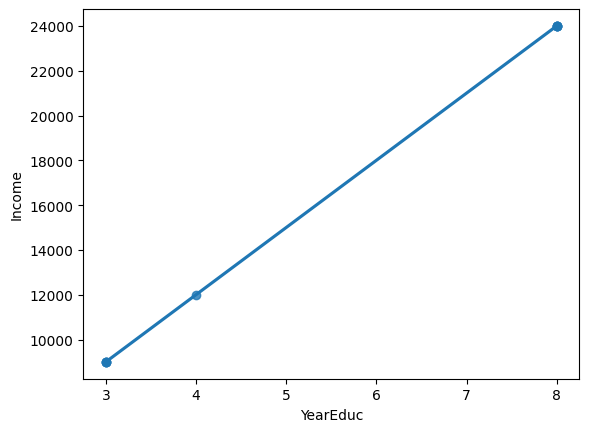

In [12]:
import seaborn as sns
sns.regplot(df,x = "YearEduc",y = "Income")

[[ 1.1370558   0.38447911]
 [ 2.07777667 -0.55624176]
 [ 1.60741624 -0.08588132]
 [-1.2666794  -0.13781436]
 [ 0.3740925   0.56223668]
 [-1.03149919 -0.37299458]
 [-1.50185962  0.09736585]
 [ 1.37223602  0.14929889]
 [-1.2666794  -0.13781436]
 [-1.50185962  0.09736585]]


<Axes: >

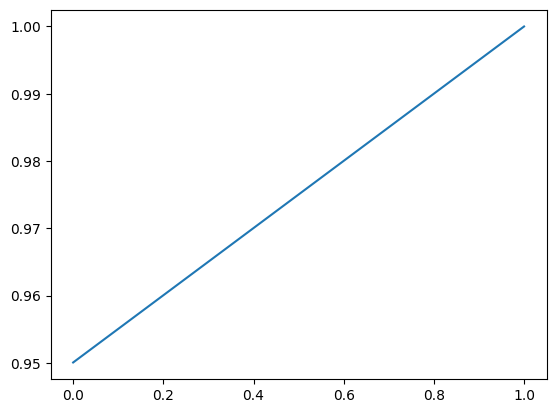

In [18]:
# PCA (principal component analysis)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()

x = df[["YearEduc","YearsExp"]]
scaled = scaler.fit_transform(x)

pca = PCA()
pca_trans = pca.fit_transform(scaled)

import numpy as np
z = np.cumsum(pca.explained_variance_ratio_)
print(pca_trans)
sns.lineplot(z)

<Axes: xlabel='Component1', ylabel='Income'>

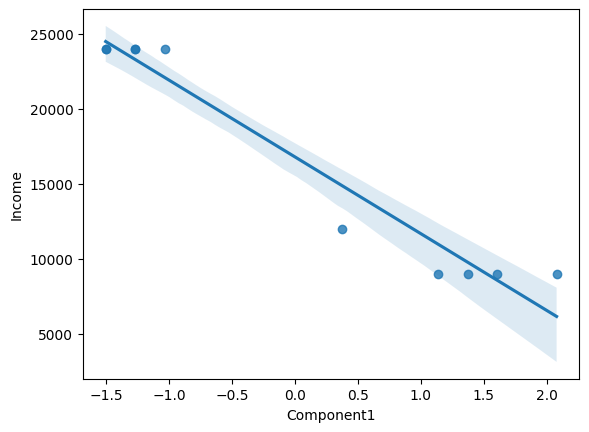

In [21]:
new = pd.DataFrame(pca_trans,columns = ['Component1',"Component2"])
new['Income'] = df['Income']
sns.regplot(new,x ="Component1",y = "Income" )

In [23]:
# get your y aand x ( inputs and outputs)
x = df[["YearEduc","YearsExp"]]
y = df['Income']
# split the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2);print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
# initialize and train the model
model = LinearRegression()
model.fit(x_train,y_train)
# evaluation of the model
pred = model.predict(x_test)
print(mae(pred,y_test))

(8, 2) (2, 2) (8,) (2,)
3.637978807091713e-12


In [24]:
y_test

5    24000
3    24000
Name: Income, dtype: int64

In [25]:
pred

array([24000., 24000.])

In [26]:
x_test

,YearEduc,YearsExp
5,8,7
3,8,8
